# Karen Loscocco
## ISYE 4133 Assignment 2

## 1 

$\textrm{For inventory pile }i = 1,...,8 \textrm{ and customers }k = 1,...,25$   
$x_{ik} \textrm{ : tons of phosphate rock from inventory } i \textrm{ for customer  } k$   
$b_{i} \textrm{ : average BPL content per ton for pile } i$   
$a_{i} \textrm{ : asset value per ton for pile } i$   
$r_{ik} \textrm{ : contract net profit per ton for pile } i \textrm{ and customer } k$   
$h_{i} \textrm{ : starting inventory for pile } i$   
$q_{i} \textrm{ : expected quantity to arrive for pile } i$   

$$\textrm{Maximize }\sum_i \left( \sum_k \left[ r_{ik}x_{ik}+a_i(h_i-x_{ik}+q_i) \right] \right)$$ 
$$\textrm{Subject To } \;\; \underline{s_k} \leq \sum_i x_{ik} \leq \overline{s_k}$$   
$$\; \; \; \; \; \; \; \; \; \; \; \; \; \; \;\;\; \; \; \;\; \; \; \; \; \; \;\textrm{If } b_i \geq \overline{p_k} \textrm{, then } x_{ik} = 0 $$   
$$\; \; \; \; \; \; \; \; \; \; \; \; \; \; \;\;\; \; \; \;\; \; \; \; \; \; \; \textrm{If } b_i \leq \underline{p_k} \textrm{, then } x_{ik} = 0 $$

$$\; \; \; \; \; \; \; \; \; \; \; \; \; \; \;  \;  \sum_k x_{ik} \leq h_i + q_i $$

## 2

### (a)

$\textrm{For }i = 1,...,7 \textrm{ and }j = 1,...,5$   
$x_{ij} \textrm{ : number of hearts produced of size } i \textrm{ from supplier } j$   
$c_j \textrm{ : unit cost of hearts produced by supplier }j$   
$a_j \textrm{ : maximum quantity availiable from supplier } j$   
$r_j \textrm{ : number of required hearts of size }i$   
$f_{ij} \textrm{ : fraction of hearts from supplier } j \textrm{ and size }i$   

$$\textrm{Minimize }\sum_j \left( c_j \sum_i x_{ij} \right)$$ 
$$\textrm{Subject To } \;\; x_{ij} \leq f_{ij}a_j$$   
$$\; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \;   \sum_j x_{ij} \geq r_i$$

  

### (b)


In [16]:
from gurobipy import *

def printOptimal(m):
    if m.Status == GRB.OPTIMAL:
        print('Variable Values:')
        for v in m.getVars():
            print(v.VarName, v.X)

        print('\nObjective Value: {}\n'.format(str(m.objVal)))
        print('\nRuntime: {}\n'.format(m.Runtime))

In [132]:
import numpy as np
f = np.array([[.4,.1,0,0,0],[.4,.2,0,0,0],[.2,.3,.4,.2,0],[0,.2,.3,.2,0],[0,.2,.3,.2,.2],[0,0,0,.2,.3],[0,0,0,.2,.5]])
r = np.array([20,30,120,200,150,60,45])
c = np.array([2.5,3.2,3.0,2.1,3.9])
a = np.array([500,330,150,650,300])

In [140]:
m = Model()

X = m.addVars(7,5, name = 'X', lb = 0)

m.setObjective(np.sum(c[j]*X.sum('*',j) for j in range(5)), GRB.MINIMIZE)

m.addConstrs(X[i,j] <= f[i,j]*a[j] for i in range(7) for j in range(5))

m.addConstrs(X.sum(i,'*') >= r[i] for i in range(7))

m.optimize()
printOptimal(m)

Optimize a model with 42 rows, 35 columns and 70 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 2e+02]
Presolve removed 36 rows and 19 columns
Presolve time: 0.01s
Presolved: 6 rows, 16 columns, 16 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.8800000e+02   5.312500e+01   0.000000e+00      0s
       6    1.4185000e+03   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.01 seconds
Optimal objective  1.418500000e+03
Variable Values:
X[0,0] 20.0
X[0,1] 0.0
X[0,2] 0.0
X[0,3] 0.0
X[0,4] 0.0
X[1,0] 30.0
X[1,1] 0.0
X[1,2] 0.0
X[1,3] 0.0
X[1,4] 0.0
X[2,0] 0.0
X[2,1] 0.0
X[2,2] 0.0
X[2,3] 120.0
X[2,4] 0.0
X[3,0] 0.0
X[3,1] 25.0
X[3,2] 45.0
X[3,3] 130.0
X[3,4] 0.0
X[4,0] 0.0
X[4,1] 0.0
X[4,2] 20.0
X[4,3] 130.0
X[4,4] 0.0
X[5,0] 0.0
X[5,1] 0.0
X[5,2] 0.0
X[5,3] 60.0
X[5,4] 0.0
X[6,0] 0.0
X[6,1] 0.0
X[6,2] 0.0
X[6,3] 45.0
X[6,4

/Users/Karen_Loscocco/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


### (c)

In [138]:
m_integer = Model()

X = m_integer.addVars(7,5, name = 'X',vtype = GRB.INTEGER, lb = 0)

m_integer.setObjective(np.sum(c[j]*X.sum('*',j) for j in range(5)), GRB.MINIMIZE)

m_integer.addConstrs(X[i,j] <= f[i,j]*a[j] for i in range(7) for j in range(5))

m_integer.addConstrs(X.sum(i,'*') >= r[i] for i in range(7))

m_integer.optimize()
printOptimal(m_integer)

Optimize a model with 42 rows, 35 columns and 70 nonzeros
Variable types: 0 continuous, 35 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 2e+02]
Found heuristic solution: objective 1598.7000000
Presolve removed 41 rows and 31 columns
Presolve time: 0.00s
Presolved: 1 rows, 4 columns, 4 nonzeros
Found heuristic solution: objective 1511.6000000
Variable types: 0 continuous, 4 integer (0 binary)

Root relaxation: objective 1.418500e+03, 1 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    1418.5000000 1418.50000  0.00%     -    0s

Explored 0 nodes (1 simplex iterations) in 0.01 seconds
Thread count was 8 (of 8 available processors)

Solution count 3: 1418.5 1511.6 1513.6 

Optimal solution found (tolerance 1.0

/Users/Karen_Loscocco/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


The two take about the same amount of time and give the same objective value. 

## 3

$\begin{pmatrix} 1 & 2 \\ 2 & 1 \\ 3 & 1 \end{pmatrix} x = \begin{pmatrix} 3 \\ 3 \\ 4\end{pmatrix}$   
   
$x \geq 0$   

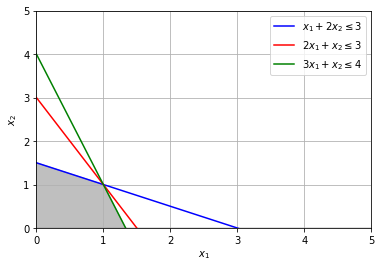

In [37]:
import matplotlib.pyplot as plt

x = np.linspace(0,5,100)

plt.plot(x, (3/2)-.5*x, '-b', label=r'$x_1+2x_2\leq 3$')
plt.plot(x, 3- 2*x , '-r', label=r'$2x_1+x_2\leq 3$')
plt.plot(x, 4- 3*x, '-g', label=r'$3x_1+x_2\leq 4$')

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.grid()
plt.xlim(0,5)
plt.ylim(0,5)

plt.fill_between(x ,np.minimum((3/2)-.5*x,4- 3*x), color='grey', alpha='0.5')
plt.show()

**Basic solutions:** $(0,0), (\frac{4}{3},0), (1,1),  (0,\frac{3}{2})$    
**Basic feasible solutions:** $(0,0), (\frac{4}{3},0), (1,1),  (0,\frac{3}{2})$   

## 4

$A = \begin{pmatrix}
    1 & 1 & 0 & 2 & 1 & 1 & 1\\
    0 & 2 & 2 & 0 & 0 & -2 & 1 \\
    1 & 2 & 1 & 5 & 4 & 3 & 3
\end{pmatrix}$

To test for basic solution (BS), the solution of $Ax$ must equal: $\begin{pmatrix}
    2 \\
    2 \\
    6
\end{pmatrix}
$   

To test for basic feasible solution (BFS), the solution must be a basic solution and also satisfy $x\geq 0$.


In [7]:
A = np.array([[1,1,0,2,1,1,1],[0,2,2,0,0,-2,1],[1,2,1,5,4,3,3]])

### (a)
Neither BS or BFS

In [8]:
x = np.array([1,1,0,0,0,0,0])
np.dot(A,x)

array([2, 2, 3])

### (b)
Neither BS or BFS

In [9]:
x = np.array([2,-1,2,0,0,0,0])
np.dot(A,x)

array([1, 2, 2])

### (c)
BS and BFS

In [10]:
x = np.array([1,0,1,0,1,0,0])
np.dot(A,x)

array([2, 2, 6])

### (d)
BS and BFS

In [11]:
x = np.array([0,0,1,1,0,0,0])
np.dot(A,x)

array([2, 2, 6])

### (e)
BS and BFS

In [12]:
x = np.array([0,.5,0,0,.5,0,1])
np.dot(A,x)

array([2., 2., 6.])

## 5

$A = \begin{pmatrix}
    2 & 1 & 1\\
    4 & 3 & 3 \\
    3 & 2 & 2 
\end{pmatrix}$
### (a)
The rank of $A$ is 2.     
 
### (b)

The following shows a way to find the linearly independent rows of $A$:   

$A^T = \begin{pmatrix}
    2 & 4 & 3\\
    1 & 3 & 2 \\
    1 & 3 & 2 
\end{pmatrix}$   

$RREF(A^T)= \begin{pmatrix}
    1 & 0 & \frac{1}{2}\\
    0 & 1 & \frac{1}{2} \\
    0 & 0 & 0 
\end{pmatrix}$

This means the third column of $A^T$ is linearly dependent:  
   
   
$\frac{1}{2}\begin{pmatrix}2 \\ 1 \\ 1 \end{pmatrix}+ \frac{1}{2}\begin{pmatrix}4 \\ 3 \\ 3 \end{pmatrix} = \begin{pmatrix}3 \\ 2 \\ 2 \end{pmatrix}$   

The linearly independent columns of $A^T$ are $\begin{pmatrix}
    2 & 4 \\
    1 & 3 \\
    1 & 3  
\end{pmatrix}$ and therefore, the linearly independent rows of $A$ are $\begin{pmatrix}
    2 & 1 & 1 \\
    4 & 3 & 3
\end{pmatrix}$.  

Based on the above, I can describe the polyhedron in the following form:   

$\begin{pmatrix}
    2 & 1 & 1 \\
    4 & 3 & 3
\end{pmatrix} \begin{pmatrix}
    x_1 \\
    x_2 \\
    x_3
\end{pmatrix} = \begin{pmatrix}
    5 \\
    9 \\
\end{pmatrix}$   

### (c)
$n-m=3-2=1$ and so there is one nonbasic variable. In other words, for each basic solution, there is one $x_i$ which equals zero. 

$(A|b) = 
\left(
\begin{array}{ccc|c}
   2 & 1 & 1 & 5 \\
    4 & 3 & 3 & 9
\end{array}
\right)
$

In [101]:
from sympy import *
Ab = Matrix([[2,1,1,5],[4,3,3,9]])
Ab

Matrix([
[2, 1, 1, 5],
[4, 3, 3, 9]])

**Case 1: $x_1 = 0$**

In [96]:
Ab[:,1:]

Matrix([
[1, 1, 5],
[3, 3, 9]])

In [97]:
Ab[:,1:].rref()[0]

Matrix([
[1, 1, 0],
[0, 0, 1]])

$x_1 = 0$   
$x_2 + x_3 = 0$   
$0 \neq 1$ so there is no solution to this system. 

**Case 2: $x_2 = 0$**

In [100]:
Ab[:,[0,2,3]]

Matrix([
[2, 1, 5],
[4, 3, 9]])

In [99]:
Ab[:,[0,2,3]].rref()[0]

Matrix([
[1, 0,  3],
[0, 1, -1]])

$x_1 = 3$   
$x_2 = 0$   
$x_3 = -1$

**Case 2: $x_3 = 0$** 

In [93]:
Ab[:,[0,1,3]]

Matrix([
[2, 1, 5],
[4, 3, 9]])

In [94]:
Ab[:,[0,1,3]].rref()[0]

Matrix([
[1, 0,  3],
[0, 1, -1]])

$x_1 = 3$   
$x_2 = -1$   
$x_3 = 0$

**The basic solutions are the following:**   
$(x_1,x_2,x_3)=(3,0,-1),(3,-1,0)$   
   
There are **no basic feasible solutions** because the basic solutions do not satisfy the condition that $x \geq 0$